# Company Bankruptcy with ML 

## Introduction
This notebook is to explore the data collected from the Taiwan Economic Journal for the years 1999 to 2009 and to see what insight can be generated during data exploration and which model is able to predict company bankruptcy most accurately.

Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange.
The modelling has been attempted using various Machine Learning Classification Algorithms. 

## Setting up Environment 

In [1]:
## necessary libraries
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_context('talk')
sns.set_style('white')
pd.option_context('display.max_rows',None)

## Data Information 

In [2]:
df= pd.read_excel('Bankruptcy data.xlsx')
print('Shape- {}'.format(df.shape))

Shape- (6819, 96)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

## Data Cleaning 

### Null Values 

In [4]:
[print(col) for col in df if df[col].isna().sum()>0]

[]

### Duplicated Records 

In [5]:
df.duplicated().sum()

0

### Column Names Rectification 

In [6]:
df.columns= [x.strip().lower().replace('?','') for x in df.columns]

## Data Understanding 

In [7]:
stats= round(df.describe().T,3)
with pd.option_context('display.max_rows',100):
    display(stats)

,count,mean,std,min,25%,50%,75%,max
bankrupt,6819.0,3.200000e-02,1.770000e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
roa(c) before interest and depreciation before interest,6819.0,5.050000e-01,6.100000e-02,0.0,4.770000e-01,5.030000e-01,5.360000e-01,1.000000e+00
roa(a) before interest and % after tax,6819.0,5.590000e-01,6.600000e-02,0.0,5.360000e-01,5.600000e-01,5.890000e-01,1.000000e+00
roa(b) before interest and depreciation after tax,6819.0,5.540000e-01,6.200000e-02,0.0,5.270000e-01,5.520000e-01,5.840000e-01,1.000000e+00
operating gross margin,6819.0,6.080000e-01,1.700000e-02,0.0,6.000000e-01,6.060000e-01,6.140000e-01,1.000000e+00
realized sales gross margin,6819.0,6.080000e-01,1.700000e-02,0.0,6.000000e-01,6.060000e-01,6.140000e-01,1.000000e+00
operating profit rate,6819.0,9.990000e-01,1.300000e-02,0.0,9.990000e-01,9.990000e-01,9.990000e-01,1.000000e+00
pre-tax net interest rate,6819.0,7.970000e-01,1.300000e-02,0.0,7.970000e-01,7.970000e-01,7.980000e-01,1.000000e+00
after-tax net interest rate,6819.0,8.090000e-01,1.400000e-02,0.0,8.090000e-01,8.090000e-01,8.090000e-01,1.000000e+00
non-industry income and expenditure/revenue,6819.0,3.040000e-01,1.100000e-02,0.0,3.030000e-01,3.040000e-01,3.040000e-01,1.000000e+00


In [8]:
df.drop('net income flag', axis=1, inplace=True)

###  Value Count of Classes in the data 

0    6599
1     220
Name: bankrupt, dtype: int64


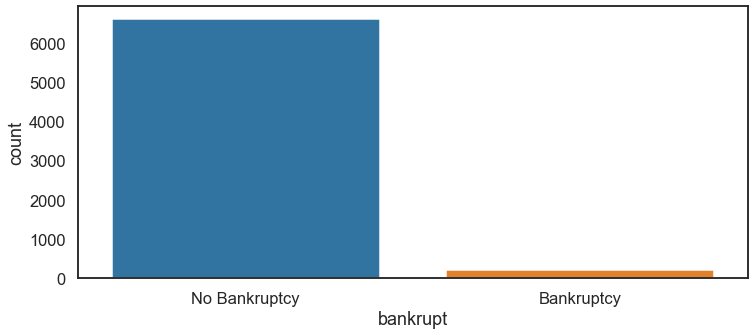

In [9]:
print(df['bankrupt'].value_counts())
plt.figure(figsize=(12,5))
ax= sns.countplot(x= df['bankrupt'])
ax.set_xticklabels(['No Bankruptcy','Bankruptcy']);

## Pearson Correlation

In [10]:
feat_cols= [x for x in df.columns if x not in 'bankrupt']
target_col= 'bankrupt'

In [11]:
corr_df= df[feat_cols].corrwith(df[target_col])

In [12]:
corr_df= pd.DataFrame(corr_df)
corr_df['abs_corr']= corr_df[0].abs()
corr_df.columns= ['correlation','abs_corr']
corr_df.head()

,correlation,abs_corr
roa(c) before interest and depreciation before interest,-0.260807,0.260807
roa(a) before interest and % after tax,-0.282941,0.282941
roa(b) before interest and depreciation after tax,-0.273051,0.273051
operating gross margin,-0.100043,0.100043
realized sales gross margin,-0.099445,0.099445


In [13]:
corr_plot= corr_df.sort_values(by='abs_corr', ascending=False).head(10)

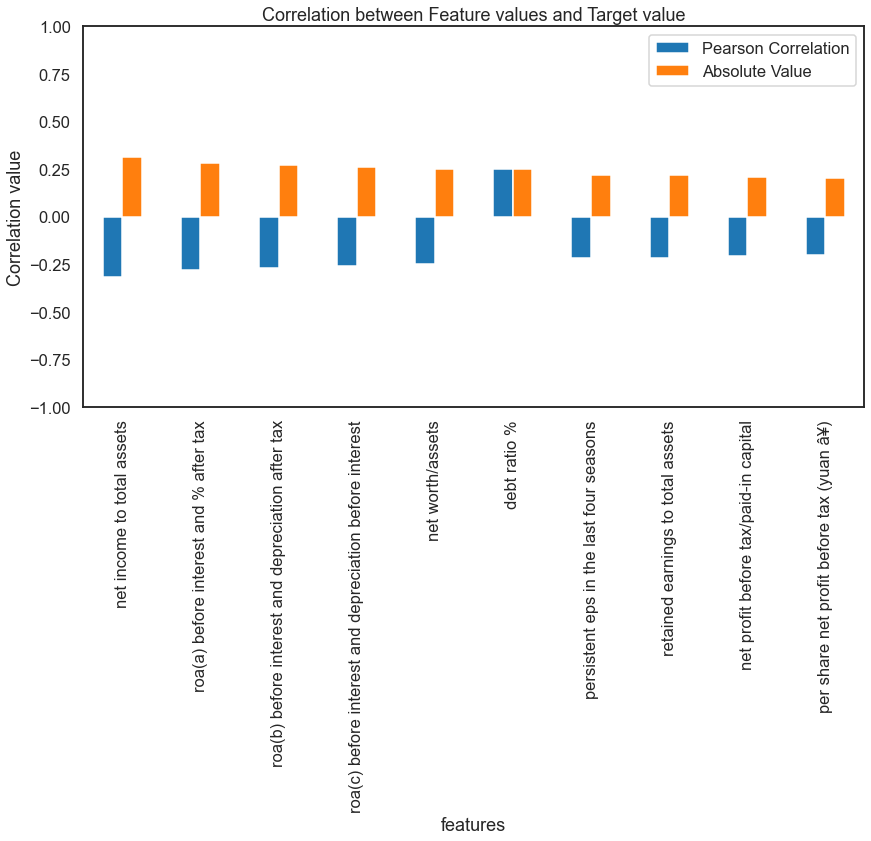

In [14]:
ax= corr_plot.plot(kind='bar',figsize=(14,7))
ax.set(xlabel='features', ylabel='Correlation value', title='Correlation between Feature values and Target value', ylim=[-1,1])
plt.legend(['Pearson Correlation','Absolute Value']);

## Difference in their means in both classes 

In [15]:
avg= round(df.groupby('bankrupt').mean(), 3).T
avg.index.name= 'features'
avg.columns= [0,1]
avg['diff']= abs(avg[0]- avg[1]).round(3)
avg.head(5)

,0,1,diff
features,,,
roa(c) before interest and depreciation before interest,0.508,0.419,0.089
roa(a) before interest and % after tax,0.562,0.457,0.105
roa(b) before interest and depreciation after tax,0.557,0.461,0.096
operating gross margin,0.608,0.599,0.009
realized sales gross margin,0.608,0.599,0.009


In [16]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
avg_plt= avg.sort_values(by= 'diff', ascending=False).head(20)

In [17]:
avg_plt.head()

,0,1,diff
features,,,
fixed assets turnover frequency,975657432.946,1996602727.274,1020945294.328
total asset growth rate,5531602816.033,4803016818.182,728585997.851
quick asset turnover rate,2147829492.348,2640836363.637,493006871.289
research and development expense rate,1961922518.564,1605623181.818,356299336.746
cash turnover rate,2481653241.552,2181732727.273,299920514.279


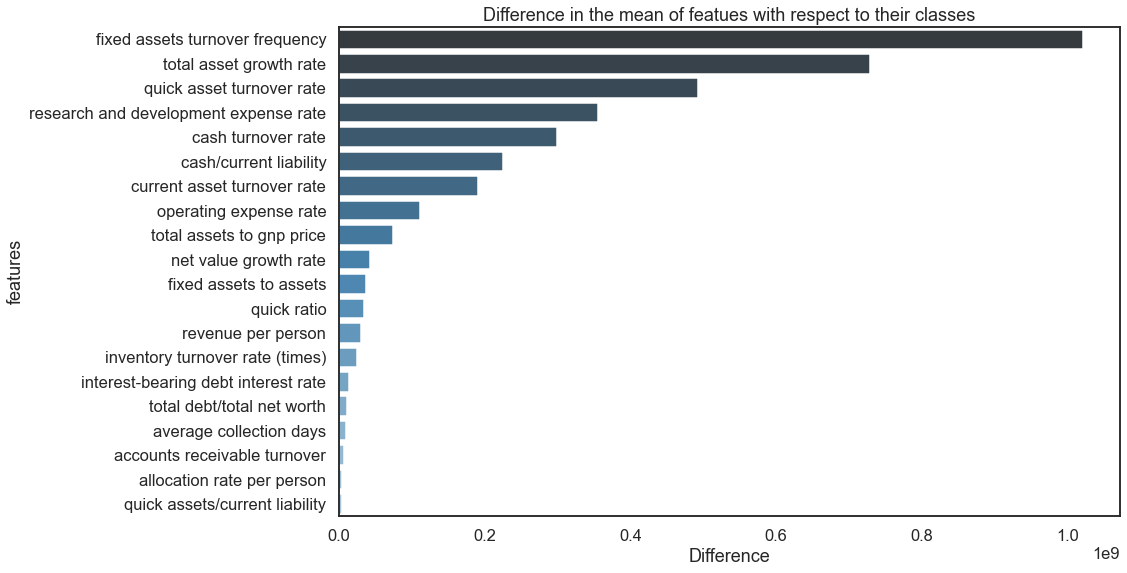

In [18]:
plt.figure(figsize=(14,9))
ax= sns.barplot(y= avg_plt.index, x= 'diff', data= avg_plt, palette='Blues_r_d')
ax.set(xlabel= 'Difference', title='Difference in the mean of featues with respect to their classes');

## Difference in median of both the classes

In [19]:
med= df.groupby('bankrupt').median().T
med.index= feat_cols
med.index.name='features'
med.columns= [0,1]
med['diff']= abs(med[0]-med[1])

In [20]:
med.head(5)

,0,1,diff
features,,,
roa(c) before interest and depreciation before interest,0.504,0.441,0.063
roa(a) before interest and % after tax,0.561,0.490,0.071
roa(b) before interest and depreciation after tax,0.554,0.489,0.065
operating gross margin,0.606,0.599,0.007
realized sales gross margin,0.606,0.599,0.007


In [21]:
med_plt= med.sort_values(by='diff', ascending= False).head(10)
med_plt.head()

,0,1,diff
features,,,
total asset growth rate,6440000000.000,5420000000.000,1020000000.000
research and development expense rate,543000000.000,154500000.000,388500000.000
cash turnover rate,1060000000.000,1305000000.000,245000000.000
inventory turnover rate (times),0.001,51600000.000,51599999.999
quick assets/total assets,0.389,0.272,0.117


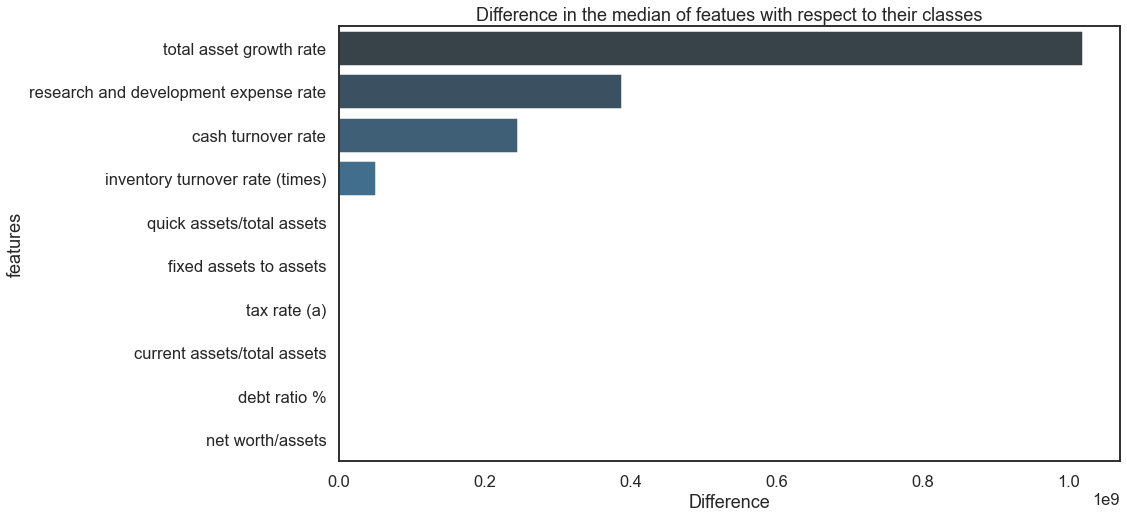

In [22]:
plt.figure(figsize=(14,8))
ax= sns.barplot(x=med_plt['diff'], y= med_plt.index, palette= 'Blues_r_d')
ax.set(xlabel= 'Difference', title='Difference in the median of featues with respect to their classes');

We see that the difference in median and mean of same features is huge and the possible reason behind this is the skewness and outliers in the data.

## Outliers in the data 

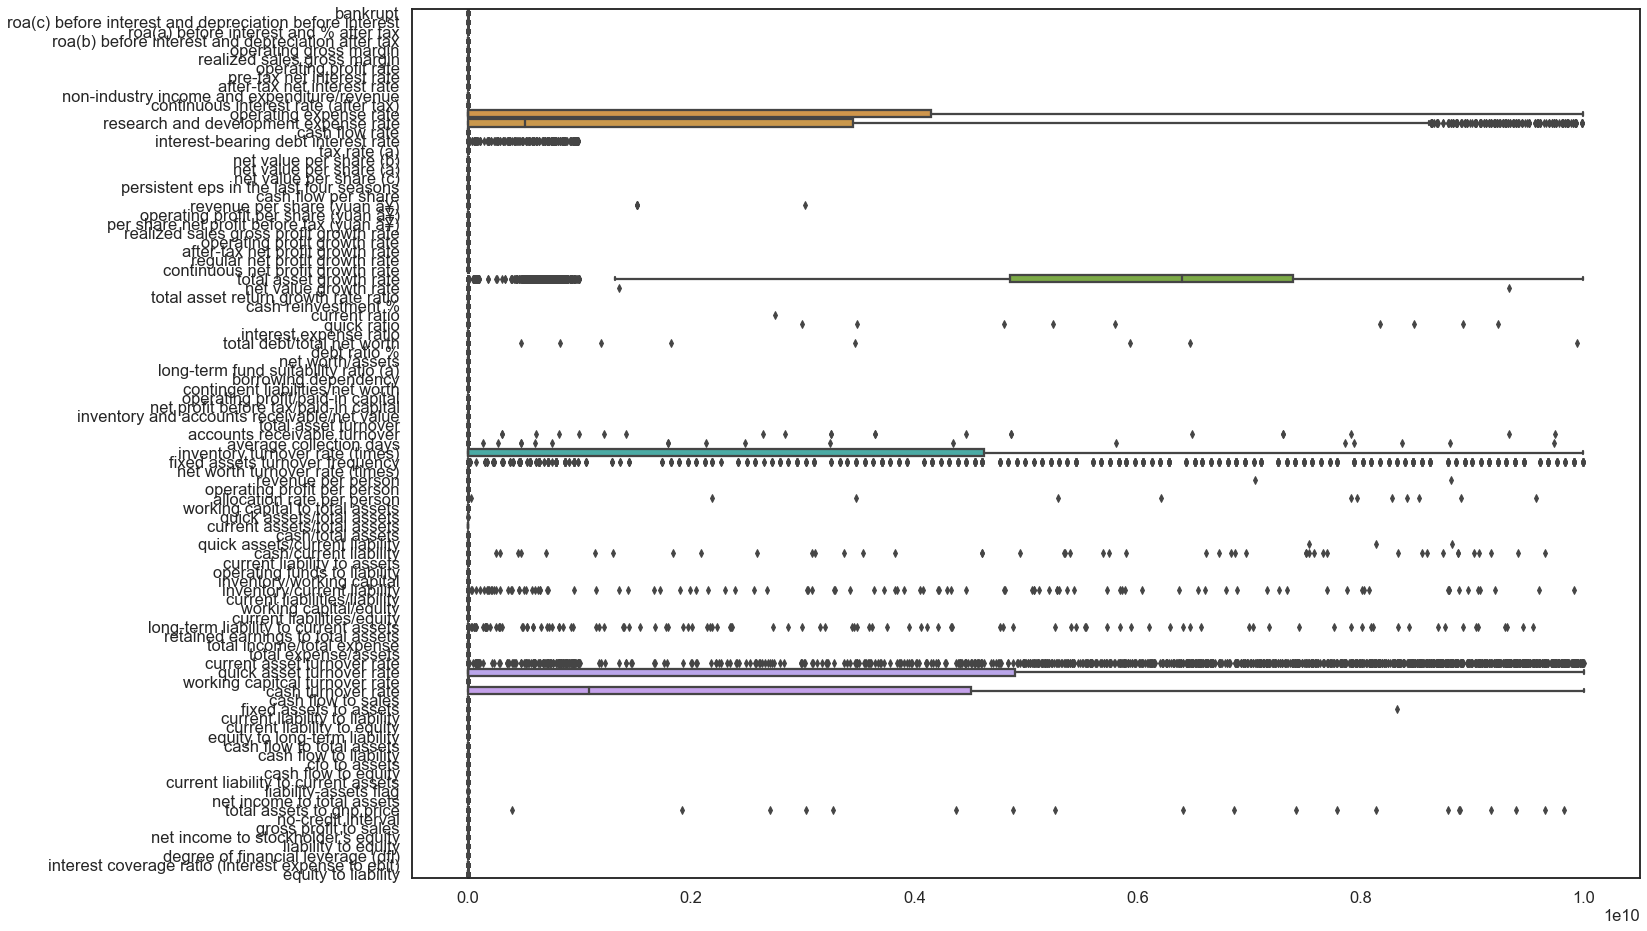

In [23]:
plt.figure(figsize=(22,16))
sns.boxplot(data= df, orient='h');

## Subsampling of Data 

Sub-Sampled data is left with 440 rows and 95 columns


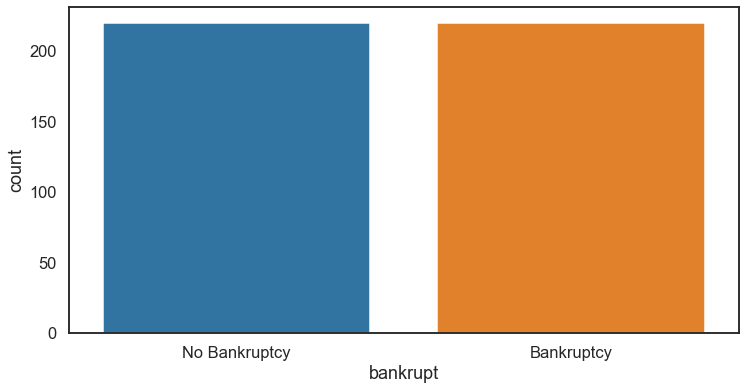

In [24]:
df2= df.sample(frac=1)
df_b= df2.loc[df2['bankrupt']==0][:220]
dfb_nb= df2.loc[df2['bankrupt']==1]

df_sub= pd.concat([df_b, dfb_nb], axis=0)
df_sub= df_sub.sample(frac=1, random_state= 42)
print('Sub-Sampled data is left with {} rows and {} columns'.format(df_sub.shape[0],df_sub.shape[1]))

plt.figure(figsize=(12,6))
ax= sns.countplot(df_sub['bankrupt'])
ax.set_xticklabels(['No Bankruptcy','Bankruptcy']);

## Correlation between Independent and Dependent columns after Sub-Sampling Data

In [25]:
corr_df= df_sub[feat_cols].corrwith(df_sub[target_col])
corr_df= pd.DataFrame(corr_df)
corr_df['abs_corr']= corr_df[0].abs()
corr_df.columns= ['correlation','abs_corr']

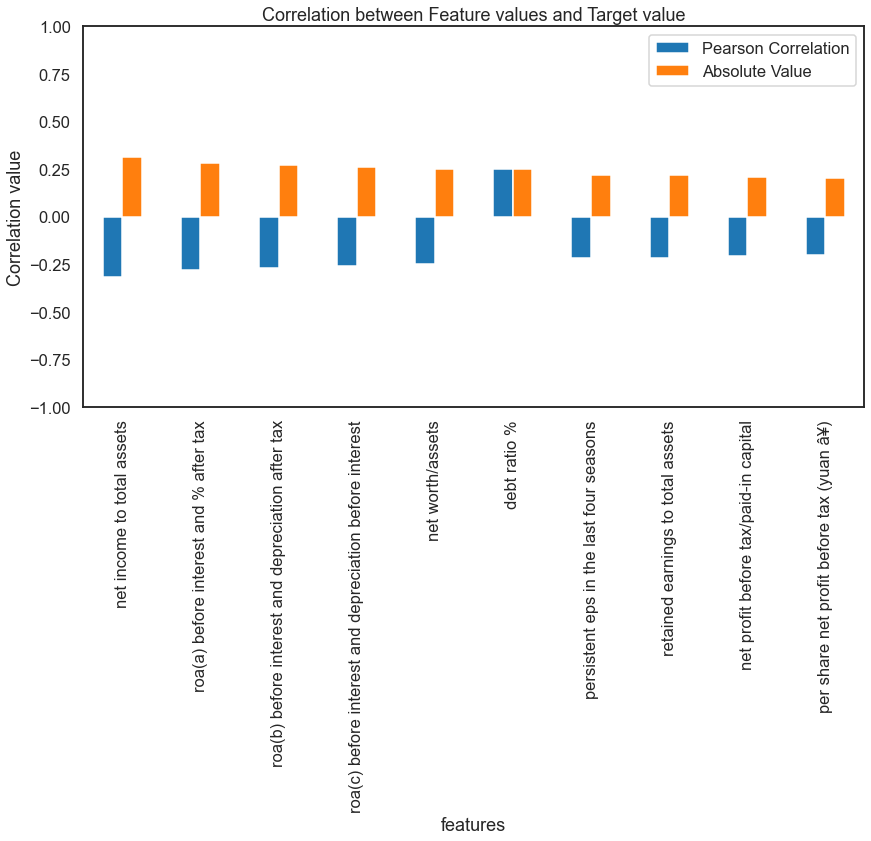

In [26]:
ax= corr_plot.plot(kind='bar',figsize=(14,7))
ax.set(xlabel='features', ylabel='Correlation value', title='Correlation between Feature values and Target value', ylim=[-1,1])
plt.legend(['Pearson Correlation','Absolute Value']);

## Data Split into Training and Testing Sets 

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(df_sub[feat_cols], df_sub[target_col], test_size=0.3, random_state= 42)

## Scaling of Feature Columns

In [28]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()

In [29]:
x_train= ss.fit_transform(x_train)
x_test= ss.transform(x_test)

## Model Development

In [30]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import VotingClassifier

In [31]:
## models
lr= LogisticRegression()
knn= KNeighborsClassifier()
dt= DecisionTreeClassifier()
rf= RandomForestClassifier()
gb= GradientBoostingClassifier()
bgg= BaggingClassifier()
ksvm= SVC()
lsvm= LinearSVC()

In [32]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

In [33]:
models= [lr, knn, dt, rf, gb, bgg, ksvm, lsvm]
names= ['Logistic Regression','KNN', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Bagging', 'Kernel SVM', 'Linear SVM']
results= []

for mod, loc in zip(models, names):
    mod.fit(x_train, y_train)
    y_pred= mod.predict(x_test)
    results.append(pd.Series(
        {
          'Accuracy': accuracy_score(y_test, y_pred),
          'Precision': precision_score(y_test, y_pred),
          'Recall':recall_score(y_test, y_pred),
          'F1 Score':f1_score(y_test, y_pred)
                             
        }, name= loc))
   
results_df= pd.concat(results, axis=1)   

## Results Evaluation 

In [34]:
results_df= results_df.T.sort_values(by='F1 Score', ascending= False)
results_df

,Accuracy,Precision,Recall,F1 Score
Random Forest,0.894,0.942,0.817,0.875
Kernel SVM,0.871,0.864,0.850,0.857
Gradient Boosting,0.871,0.922,0.783,0.847
Logistic Regression,0.864,0.875,0.817,0.845
Bagging,0.856,0.918,0.750,0.826
Linear SVM,0.841,0.855,0.783,0.817
Decision Tree,0.841,0.882,0.750,0.811
KNN,0.833,0.865,0.750,0.804


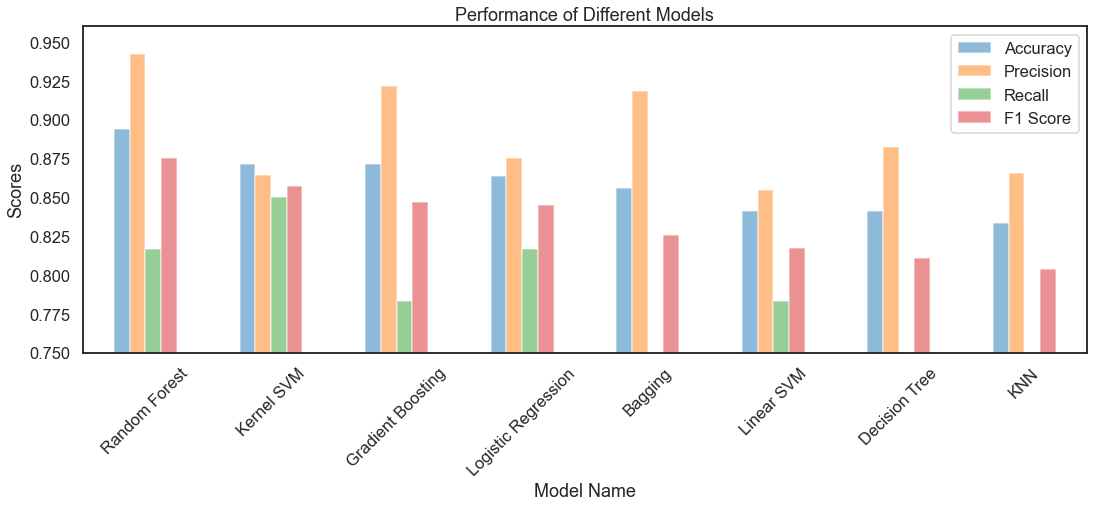

In [35]:
ax= results_df.plot(kind= 'bar', figsize=(18,6), alpha= 0.5)
ax.set(xlabel= 'Model Name',
      ylabel= 'Scores',
      title= 'Performance of Different Models',
      ylim= [0.75,0.96])
plt.xticks(rotation= 45);

It is evident that Random Forest is performing better than all other models. Kernel Support Vector Machines is also producing a nice output. Hence we can deploy final model either with Random Forest or Kernel-SVM or we can build a new model stacking both of them in order to have a better output.

In [36]:
## GridSearchCV
from sklearn.model_selection import GridSearchCV

## Tuning Best Performing Models with Different Hyper-Parameters

## Random Forest 

In [37]:
%%time
params= {'max_features':range(1, len(rf.feature_importances_)+1),
        'criterion':['gini','entropy']}

est=  RandomForestClassifier(random_state= 42,
                              warm_start= True)
                                                    
gs_rf= GridSearchCV(estimator=est,
                    param_grid= params,
                    n_jobs=-1,
                    cv=6).fit(x_train, y_train)
                    
y_pred= gs_rf.predict(x_test)

CPU times: total: 4.08 s
Wall time: 7min 18s


              precision    recall  f1-score   support

           0       0.84      0.94      0.89        72
           1       0.92      0.78      0.85        60

    accuracy                           0.87       132
   macro avg       0.88      0.86      0.87       132
weighted avg       0.88      0.87      0.87       132



Old Random Forest Scores-  
 Accuracy    0.890
Precision   0.940
Recall      0.820
F1 Score    0.870
Name: Random Forest, dtype: float64


Best Estimator-  
 RandomForestClassifier(max_features=44, random_state=42, warm_start=True)


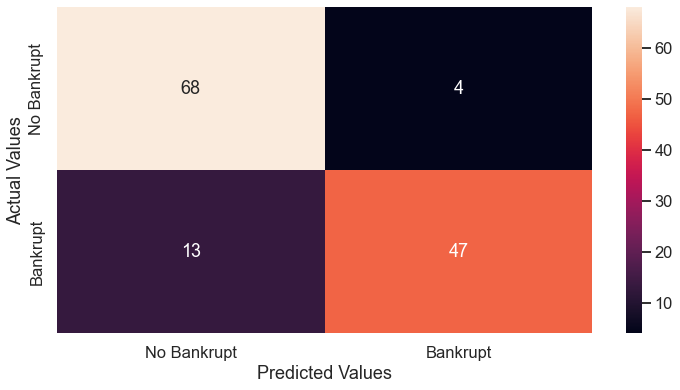

In [38]:
print(classification_report(y_test, y_pred))
print('\n')
print('Old Random Forest Scores- ','\n',round(results_df.loc['Random Forest'],2))
print('\n')
print('Best Estimator- ','\n', gs_rf.best_estimator_)

plt.figure(figsize=(12,6))
ax= sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
label= ['No Bankrupt', 'Bankrupt']

ax.set(xlabel= 'Predicted Values',
      ylabel='Actual Values')

ax.set_xticklabels(label)
ax.set_yticklabels(label);

## Kernel Support Vector Machines 

In [39]:
%%time
params= {
    'C':[0.001,0.01,1,5,120,50,80,100],
         'gamma':[0.0001,0.001,0.1,1,10,20,50,80,100]
    
}

est= SVC(kernel= 'rbf', random_state= 42)

gs_ksvm= GridSearchCV(estimator= est,
                     param_grid= params,
                     cv=6,
                     n_jobs=-1).fit(x_train, y_train)

y_pred= gs_ksvm.predict(x_test)

CPU times: total: 328 ms
Wall time: 7.64 s


              precision    recall  f1-score   support

           0       0.86      0.94      0.90        72
           1       0.92      0.82      0.87        60

    accuracy                           0.89       132
   macro avg       0.89      0.88      0.88       132
weighted avg       0.89      0.89      0.89       132



Old Results-  
 Accuracy    0.870
Precision   0.860
Recall      0.850
F1 Score    0.860
Name: Kernel SVM, dtype: float64


Best Estimator-  
 SVC(C=1, gamma=0.001, random_state=42)


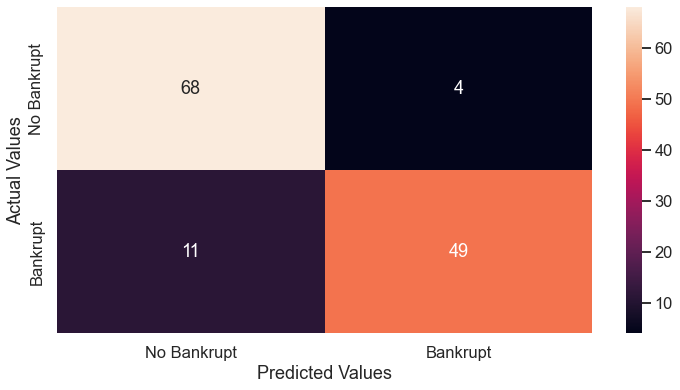

In [41]:
print(classification_report(y_test, y_pred))
print('\n')
print('Old Results- ','\n', round(results_df.loc['Kernel SVM'],2))
print('\n')
print('Best Estimator- ','\n', gs_ksvm.best_estimator_)

plt.figure(figsize=(12,6))
ax= sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
ax.set(xlabel= 'Predicted Values',
      ylabel='Actual Values')
ax.set_xticklabels(['No Bankrupt','Bankrupt'])
ax.set_yticklabels(['No Bankrupt','Bankrupt']);